In [1]:
import velvetvae as vt

# general packages
import numpy as np
import pandas as pd
import torch
from scipy.sparse import issparse

# velocity packages
import scanpy as sc
import scvelo as scv
import anndata as ann

# plotting packages
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, trange
from IPython.display import clear_output

# color palette object
from colors import colorpalette as colpal

from scvi.model.utils import mde
import pymde
from matplotlib.patheffects import withStroke

Global seed set to 0
/camp/home/maizelr/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/camp/home/maizelr/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
adata0 = sc.read_h5ad("../data/celltyped_adata.h5ad")

In [3]:
adata = adata0.copy()
adata = adata[adata.obs.cell_annotation!='other']

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

vt.ut.set_seed(0)
np.random.seed(0)
pymde.seed(0)

genes = vt.pp.select_genes(
    adata[adata.obs.rep!='r4'], # we remove r4 because we stratify by replicate
    n_variable_genes=3000,
    stratify_obs='rep'
)

adata = adata[:, genes]

In [4]:
tps = [['D3'], ['D3.2', 'D3.4', 'D3.6', 'D3.8'], ['D4'], ['D5'], ['D6'], ['D7'], ['D8']]
titles = ['Day 3', 'Day 3.2-3.8', 'Day 4', 'Day 5', 'Day 6', 'Day 7', 'Day 8']

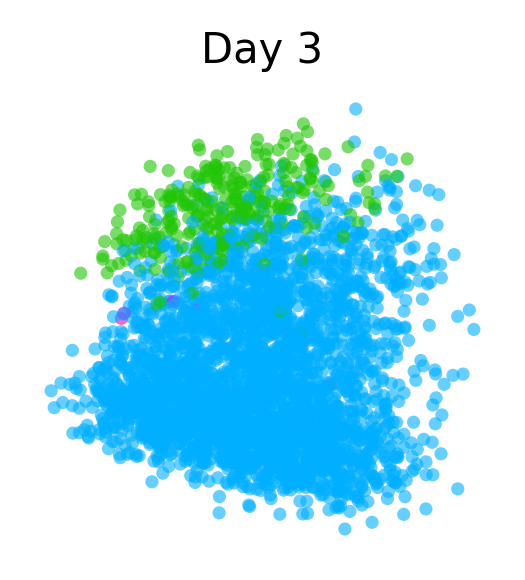

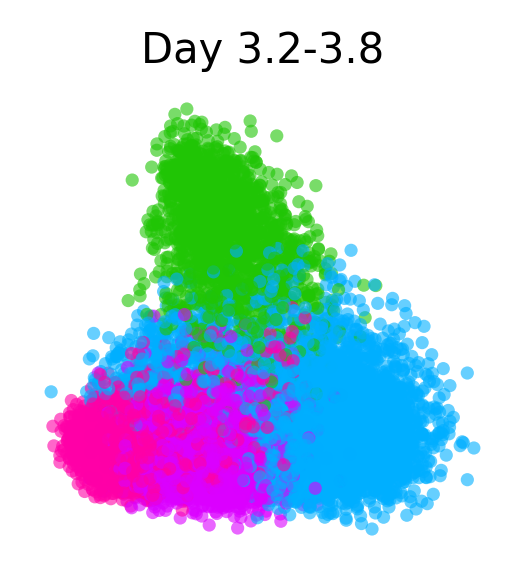

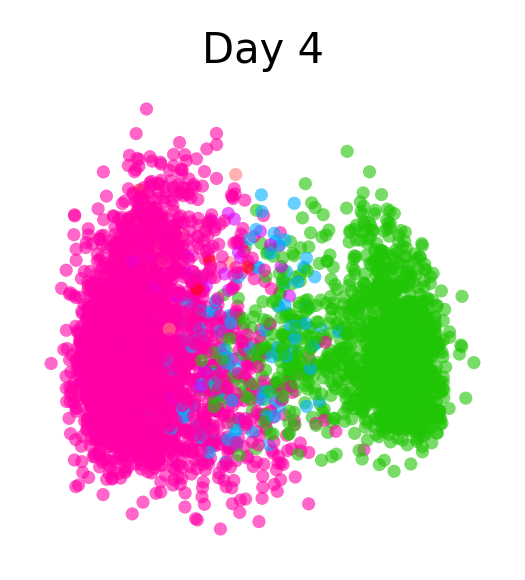

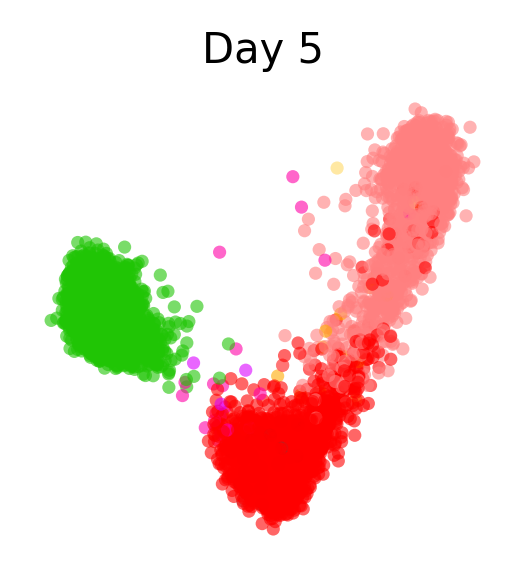

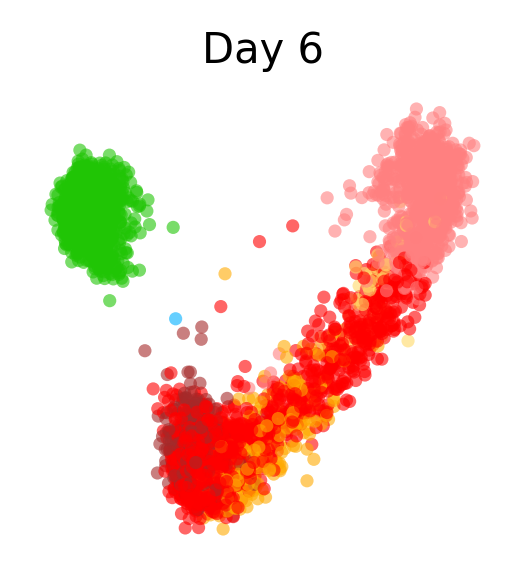

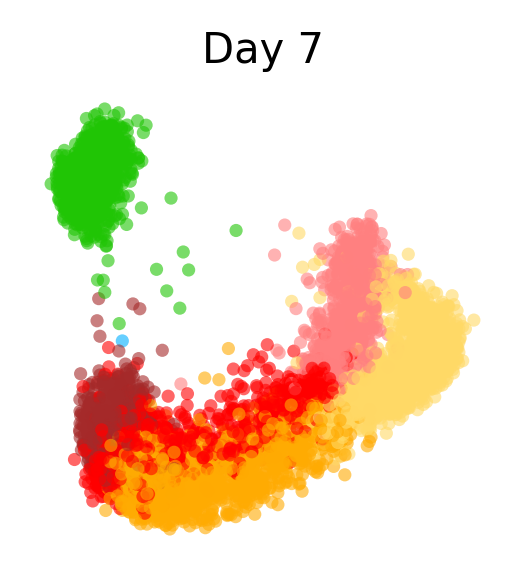

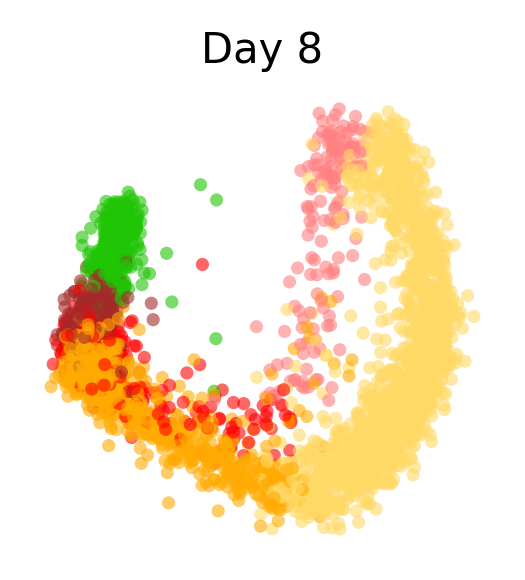

In [14]:
for tp, tp_title in zip(tps, titles):
    sub = adata[[t in tp for t in adata.obs.timepoint]].copy()
    sc.tl.pca(sub, svd_solver='arpack')
    fig = plt.figure(figsize=(2,2), dpi=300)
    ax = fig.subplots()

    scv.pl.scatter(
        sub,
        basis="pca",
        color=['cell_annotation'],
        frameon=False, ax=ax,
        size=40, alpha=.6,
        legend_loc='none', 
        palette=colpal.celltype, 
        legend_fontsize=8, 
        legend_fontoutline=10,
        show=False, 
        title=tp_title,
    )
    
    props = dict(boxstyle='round', facecolor='red', alpha=0.5)
    plt.savefig(
        f"../figures/1.4.1_timepoint_data_{tp_title.lower().replace(' ','_')}.png", 
        bbox_inches='tight', 
        transparent=True
    )
    plt.show()

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')

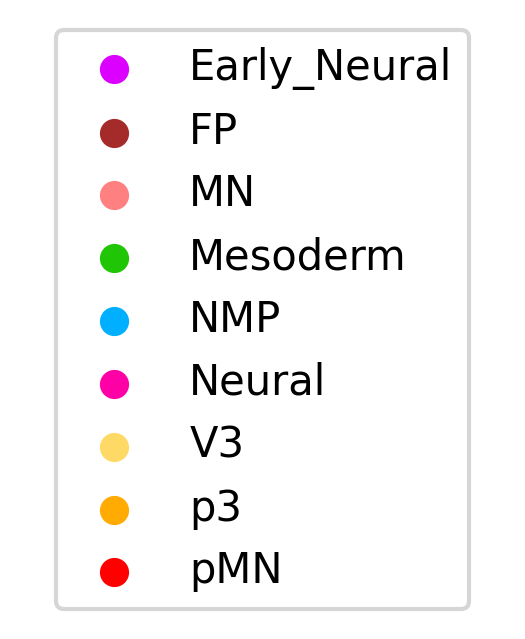

In [39]:
fig = plt.figure(figsize=(0,0), dpi=50)
ax = fig.subplots()

sc.pl.embedding(
    adata,
    basis="X_pca",
    color=['cell_annotation'],
    frameon=False, 
    ax=ax,
    ncols=3, 
    size=40, 
    alpha=.6,
    legend_loc='right margin',  # Adjust this as needed
    palette=colpal.celltype,
    legend_fontsize=8,
    legend_fontoutline=10,
    show=False,
    title=tp_title,
)

legend = ax.get_legend()
plt.close()
fig_leg = plt.figure(figsize=(2,2), dpi=300)
ax_leg = fig_leg.add_subplot(111)
ax_leg.legend(handles=legend.legendHandles, labels=[t.get_text() for t in legend.get_texts()], loc='center')
ax_leg.axis('off')

props = dict(boxstyle='round', facecolor='red', alpha=0.5)
plt.savefig(
    f"../figures/1.4.2_timepoint_data_legend.png", 
    bbox_inches='tight', 
    transparent=True
)
plt.show()